In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/allankim/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/allankim/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/allankim/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/allankim/anaconda3/lib/python3.7/site-packag

In [2]:
#pre-processing images taken from keras documentation
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'Images/DATASET/TRAIN',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(
    'Images/DATASET/TEST',
    target_size=(256, 256),
    batch_size=4,
    class_mode='binary')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [3]:
# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(64, (3, 3), input_shape = (256, 256, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the Model
classifier.add(Flatten())

# Connecting all layer
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the model
classifier.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
class1 = classifier.fit(
    training_set,
    epochs=100,
    validation_data=test_set)


Epoch 1/100
22564/22564 [==============================] - 238s 11ms/step - loss: 0.5293 - accuracy: 0.7652 - val_loss: 0.4143 - val_accuracy: 0.8444
Epoch 2/100
22564/22564 [==============================] - 244s 11ms/step - loss: 0.5069 - accuracy: 0.7760 - val_loss: 0.1768 - val_accuracy: 0.8261
Epoch 3/100
22564/22564 [==============================] - 242s 11ms/step - loss: 0.4647 - accuracy: 0.8043 - val_loss: 0.0094 - val_accuracy: 0.8317
Epoch 4/100
22564/22564 [==============================] - 246s 11ms/step - loss: 0.4207 - accuracy: 0.8217 - val_loss: 0.2060 - val_accuracy: 0.8050
Epoch 5/100
22564/22564 [==============================] - 248s 11ms/step - loss: 0.3950 - accuracy: 0.8351 - val_loss: 3.5475 - val_accuracy: 0.8587
Epoch 6/100
22564/22564 [==============================] - 246s 11ms/step - loss: 0.3968 - accuracy: 0.8349 - val_loss: 7.2461e-05 - val_accuracy: 0.7405
Epoch 7/100
22564/22564 [==============================] - 249s 11ms/step - loss: 0.3702 - accu

22564/22564 [==============================] - 247s 11ms/step - loss: 0.1611 - accuracy: 0.9442 - val_loss: 1.2811 - val_accuracy: 0.8687
Epoch 54/100
22564/22564 [==============================] - 248s 11ms/step - loss: 0.1565 - accuracy: 0.9450 - val_loss: 0.0354 - val_accuracy: 0.8671
Epoch 55/100
22564/22564 [==============================] - 248s 11ms/step - loss: 0.1551 - accuracy: 0.9466 - val_loss: 0.0530 - val_accuracy: 0.8675
Epoch 56/100
22564/22564 [==============================] - 236s 10ms/step - loss: 0.1510 - accuracy: 0.9467 - val_loss: 0.0366 - val_accuracy: 0.8591
Epoch 57/100
22564/22564 [==============================] - 249s 11ms/step - loss: 0.1631 - accuracy: 0.9432 - val_loss: 3.5718 - val_accuracy: 0.8802
Epoch 58/100
22564/22564 [==============================] - 255s 11ms/step - loss: 0.1592 - accuracy: 0.9461 - val_loss: 0.0056 - val_accuracy: 0.8579
Epoch 59/100
22564/22564 [==============================] - 251s 11ms/step - loss: 0.1563 - accuracy: 0.945

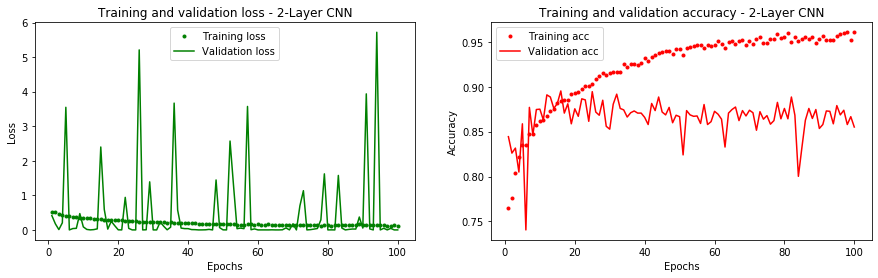

In [5]:
#Extracting CNN Results for Visualization
hist_cnn = class1.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['accuracy'] 
val_acc_values = hist_cnn['val_accuracy']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss - 2-Layer CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy - 2-Layer CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('Images/Model/cnn1.png')
plt.show()

In [ ]:
63